In [1]:
import numpy as np
import pandas as pd
from functions import *
import matplotlib.pyplot as plt
from scipy.stats import norm

In [4]:
NAME_CURRENCIES = ["BTC", 'ADA', 'DOGE', 'DOT', 'ETH', 'LTC', 'SOL', 'TRX', 'XLM', 'XRP']


data_dictionary = {name: None for name in NAME_CURRENCIES}
df = pd.read_csv("./data/crypto21to24python.csv")

set(df["symbol"])

n = df.shape[0]//len(NAME_CURRENCIES)
n

1461

In [5]:
cryp_dict = {key: df[df["symbol"] == key][["open", "high", "low", "close"]] for key in NAME_CURRENCIES}

close_matrix = np.zeros([len(NAME_CURRENCIES), n])
open_matrix = np.zeros([len(NAME_CURRENCIES), n])
high_matrix = np.zeros([len(NAME_CURRENCIES), n])
low_matrix = np.zeros([len(NAME_CURRENCIES), n])


for name_idx in range(len(NAME_CURRENCIES)):
    name = NAME_CURRENCIES[name_idx]
    for idx in range(n):
        # print(name)
        close_matrix[name_idx, idx] = cryp_dict[name].iloc[idx]["close"]
        open_matrix[name_idx, idx] = cryp_dict[name].iloc[idx]["open"]
        high_matrix[name_idx, idx] = cryp_dict[name].iloc[idx]["high"]
        low_matrix[name_idx, idx] = cryp_dict[name].iloc[idx]["low"]

In [6]:
close_matrix = np.log(close_matrix[:, 1:]) - np.log(close_matrix[:, :-1])
open_matrix = np.log(open_matrix[:, 1:]) - np.log(open_matrix[:, :-1])
high_matrix = np.log(high_matrix[:, 1:]) - np.log(high_matrix[:, :-1])
low_matrix = np.log(low_matrix[:, 1:]) - np.log(low_matrix[:, :-1])

In [6]:
close_matrix.shape

(10, 1460)

## Make autocorrelation plots

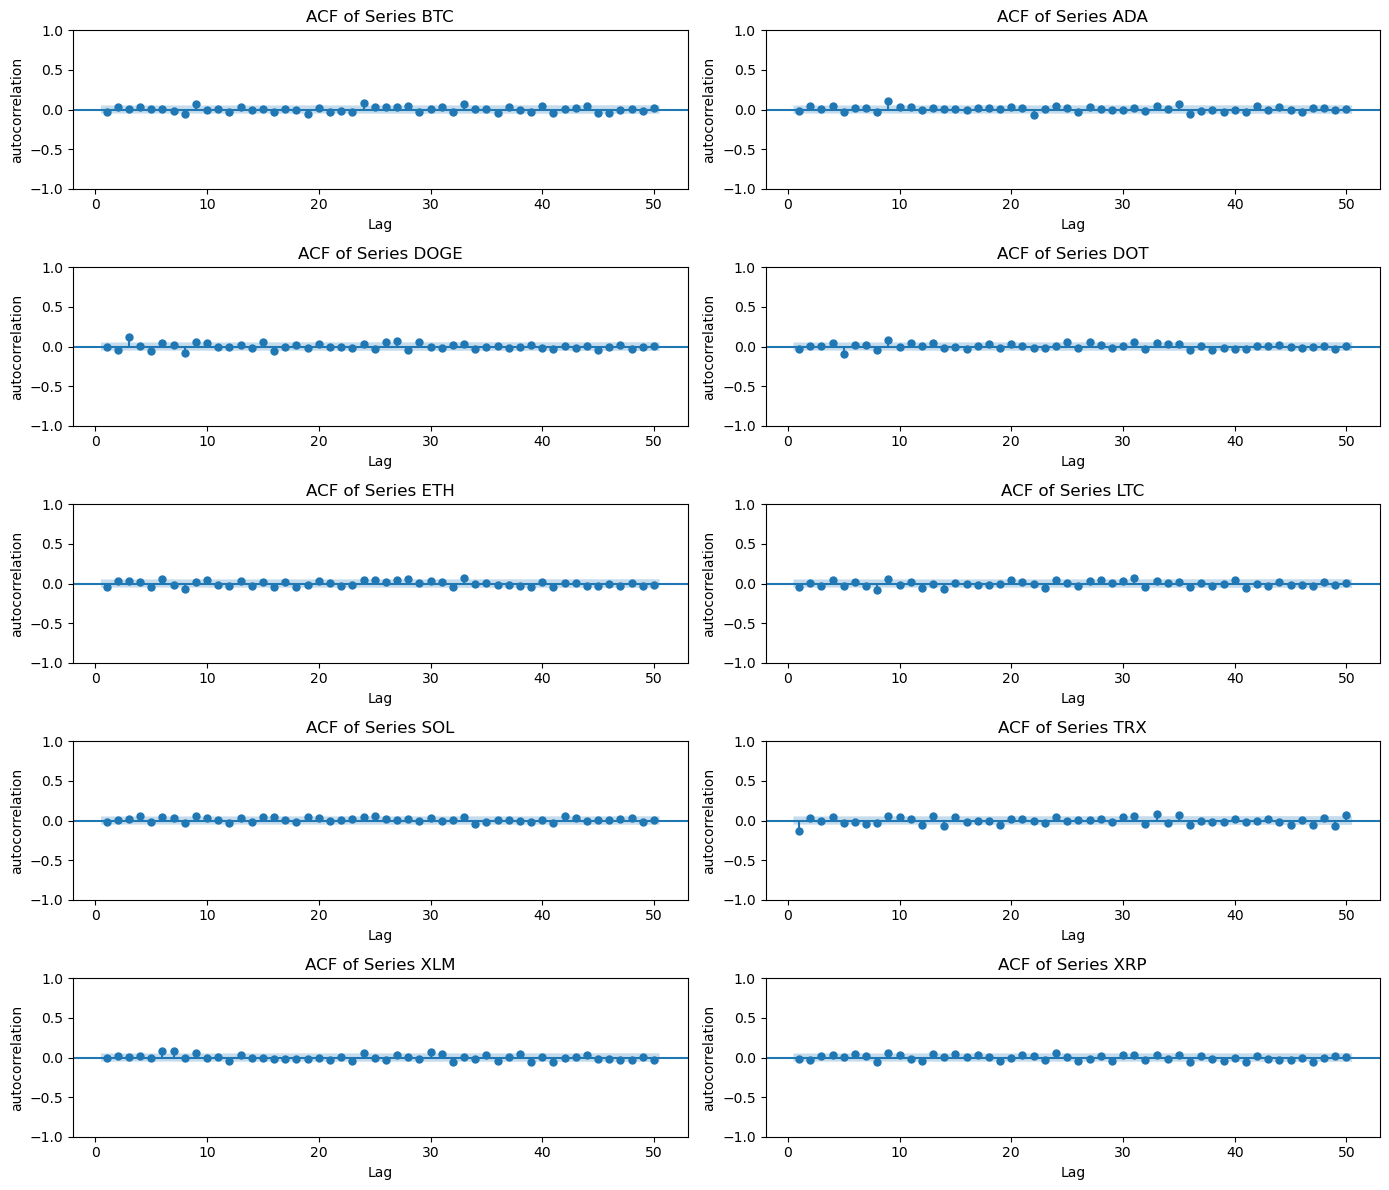

In [17]:
fig, axes = plt.subplots(5, 2, figsize=(14, 12))
axes = axes.flatten()  # Make indexing easier

# Choose a reasonable max lag — e.g., 50 for daily data
max_lag = 50

# Create ACF plots
for i in range(10):
    ax = axes[i]
    plot_acf(close_matrix[i], ax=ax, lags=max_lag, title="ACF of Series {}".format(NAME_CURRENCIES[i]), zero=False)
    ax.set_xlabel("Lag")
    ax.set_ylabel("autocorrelation")

plt.tight_layout()
plt.show()

## Plot of $\Delta$'s all versus all

In [6]:
# there will be in total 10 * 9 / 2 = 45 plots
k_list =  list(range(50, 500, 10))
num_k = len(k_list)
num_cur = len(NAME_CURRENCIES)


delta_all_vs_all = np.zeros([45, num_k])

idx = 0
for i in range(num_cur):
    for j in range(i+1, num_cur):
        xs = close_matrix[i, :]
        ys = close_matrix[j, :]
        for k_i in range(num_k):
            k = k_list[k_i]
            delta_all_vs_all[idx, k_i] = delta(xs, ys, k)
        idx += 1

In [ ]:
# save data


np.save("./results/python_output/delta_all_vs_all.npy", delta_all_vs_all)

In [ ]:
# load data

delta_all_vs_all = np.load()

<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
/var/folders/4m/lbzt0vfd14gdl0qd39xm38g40000gn/T/ipykernel_1049/2376101542.py:17: SyntaxWarning: invalid escape sequence '\D'
  ax.set_ylabel("value of $\Delta$")


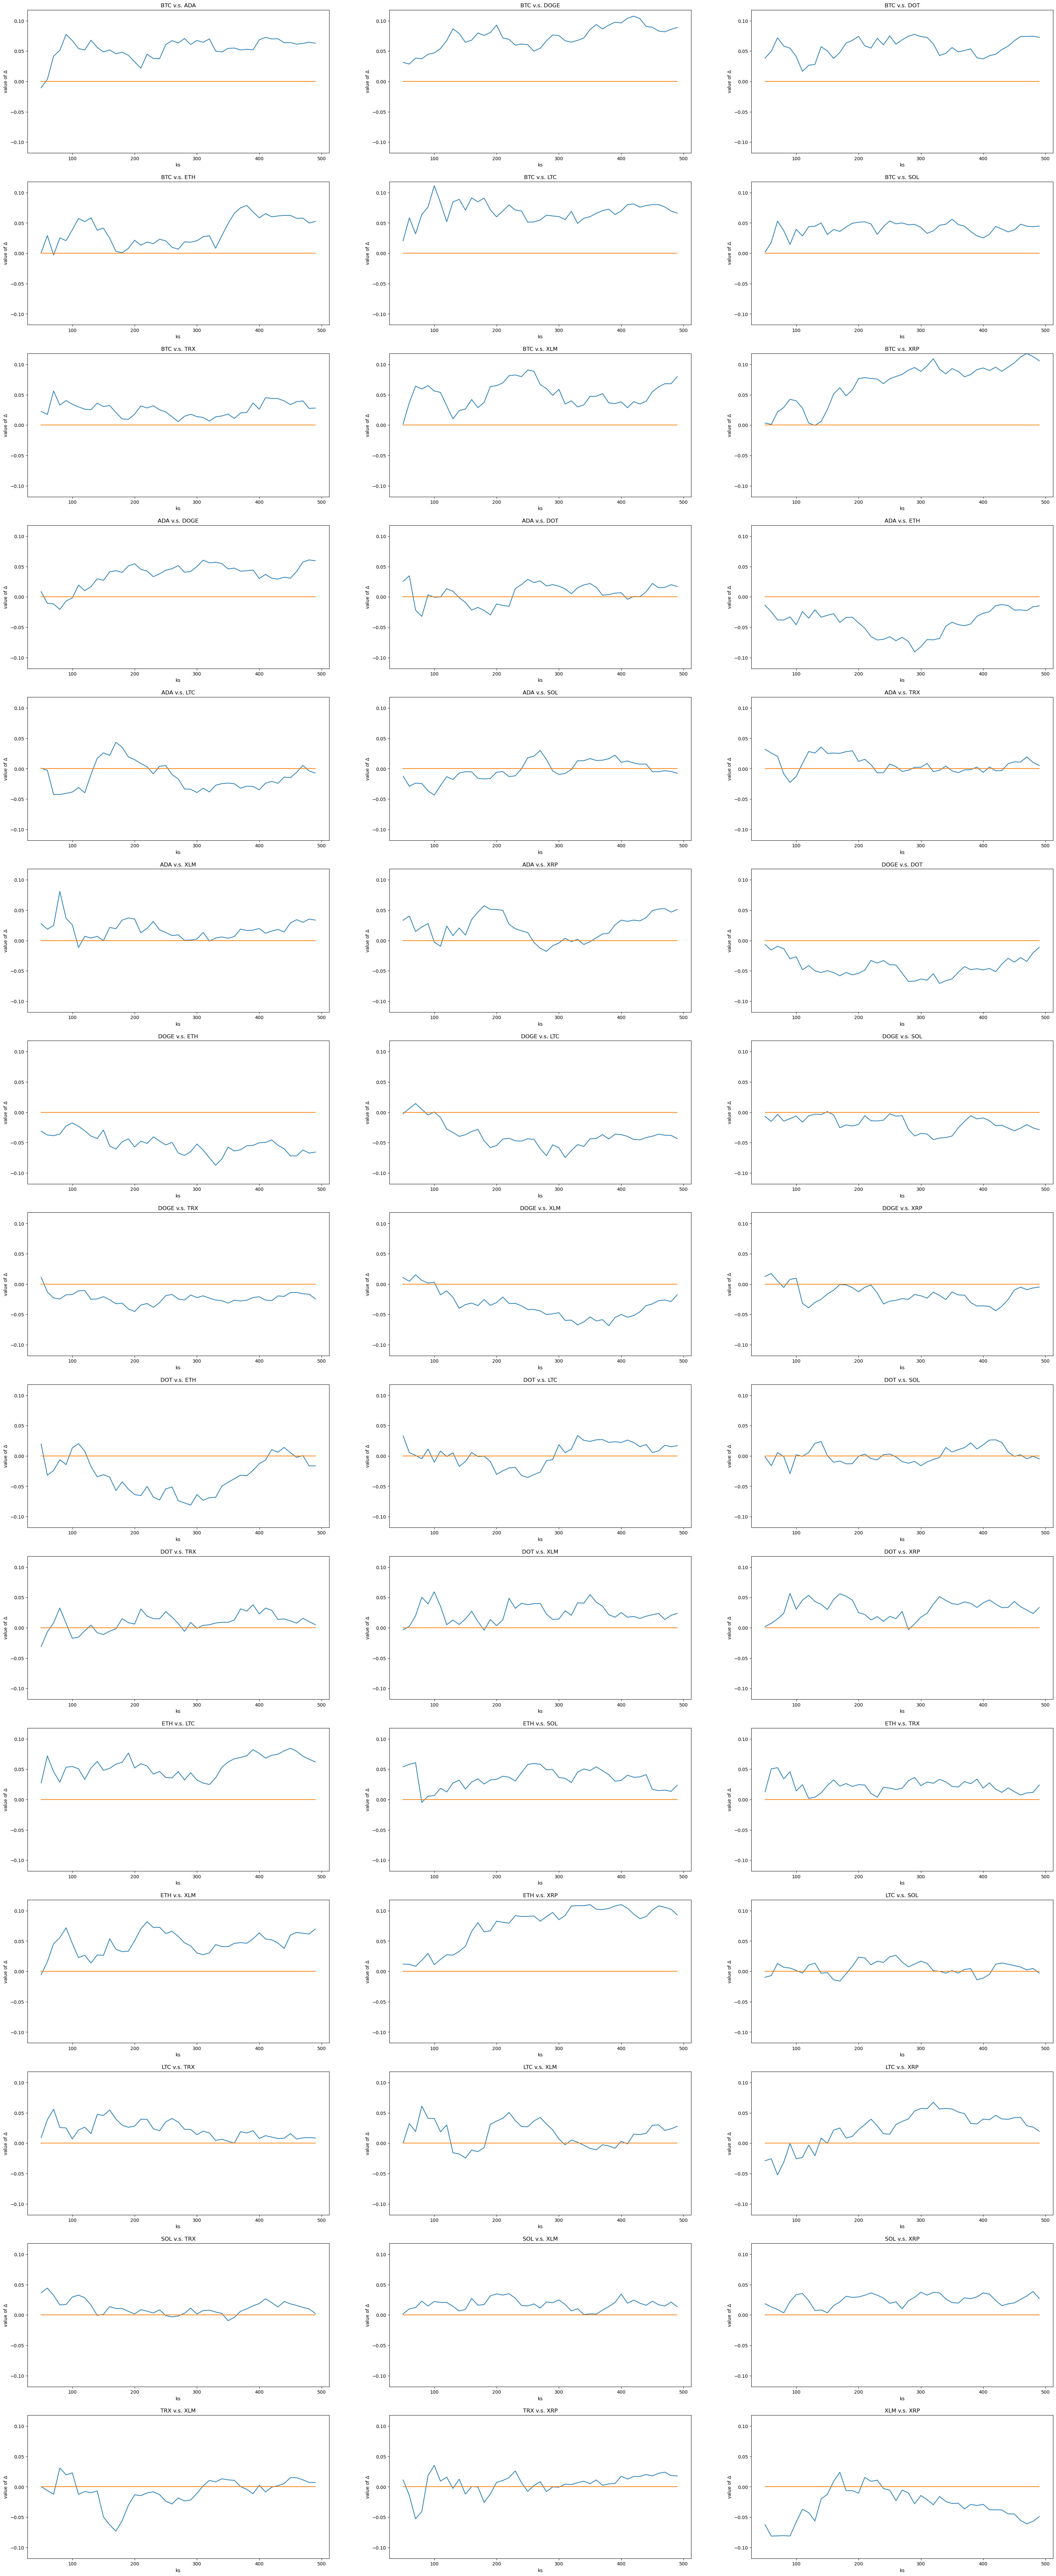

In [12]:


fig, axes = plt.subplots(15,3, figsize=(40, 100))
axes = axes.flatten()  # Make indexing easier

idx = 0

lim = delta_all_vs_all.max()

for i in range(num_cur):
    for j in range(i+1, num_cur):
        name_i = NAME_CURRENCIES[i]
        name_j = NAME_CURRENCIES[j]

        ax = axes[idx]
        ax.plot(k_list, delta_all_vs_all[idx,:])
        ax.plot(k_list, np.zeros_like(k_list))
        ax.set_xlabel("ks")
        ax.set_ylabel("value of $\Delta$")
        ax.set_title("{} v.s. {}".format( name_i,  name_j))
        ax.set_ylim(-lim, lim)
        idx += 1

